# Imports and Setup

In [ ]:
import numpy as np

!pip install nbeats-keras
from nbeats_keras.model import NBeatsNet as NBeatsKeras

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import os
import math
import glob
import scipy
!pip install tensorflow_datasets
import tensorflow_datasets as tfds

from csv import writer

from statistics import stdev

import pickle
import matplotlib.pyplot as plt

# Loading the Data

In [ ]:
filename = 'Data/75.pkl'

with open(filename, 'rb') as f:
    train_x, train_y, max_ABP = pickle.load(f)

In [ ]:
inputs = train_x
targets = train_y

In [ ]:
train_x.shape

(105443, 250, 2)

In [ ]:
train_y.shape

(105443, 2)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.20, shuffle=True)

In [ ]:
test_y = test_y*max_ABP

# NBeats Model

In [ ]:
time_steps, input_dim, output_dim = 250,2,2

model = NBeatsKeras(
            backcast_length=time_steps, forecast_length=output_dim,
            stack_types=(NBeatsKeras.GENERIC_BLOCK, NBeatsKeras.GENERIC_BLOCK),
            nb_blocks_per_stack=4, thetas_dim=(4, 4), share_weights_in_stack=True,
            hidden_layer_units=128
        )

model.compile(loss='mae', optimizer='adam')

model.fit(train_x, train_y, epochs=50, batch_size=128)

Epoch 1/50
660/660 [==============================] - 24s 34ms/step - loss: 0.0606
Epoch 2/50
660/660 [==============================] - 20s 30ms/step - loss: 0.0530
Epoch 3/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0511
Epoch 4/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0492
Epoch 5/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0480
Epoch 6/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0473
Epoch 7/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0458
Epoch 8/50
660/660 [==============================] - 14s 21ms/step - loss: 0.0448
Epoch 9/50
660/660 [==============================] - 14s 21ms/step - loss: 0.0438
Epoch 10/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0431
Epoch 11/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0425
Epoch 12/50
660/660 [==============================] - 13s 20ms/step - loss: 0.0417
E

# Relevant Plots

## Training

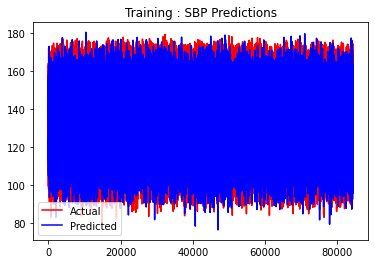

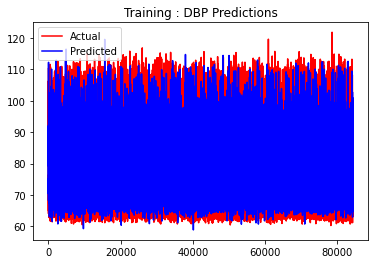

In [ ]:
train_predicted = model.predict(train_x)

plt.plot(train_y[:,0]*max_ABP, color='r', label = 'Actual')
plt.plot(train_predicted[:,0]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Training : SBP Predictions')

plt.show()

plt.plot(train_y[:,1]*max_ABP, color='r', label = 'Actual')
plt.plot(train_predicted[:,1]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Training : DBP Predictions')

plt.show()

## Testing

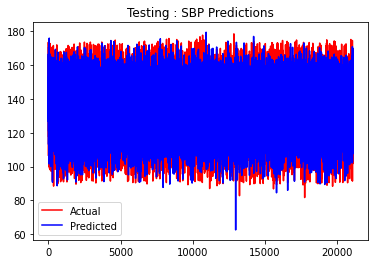

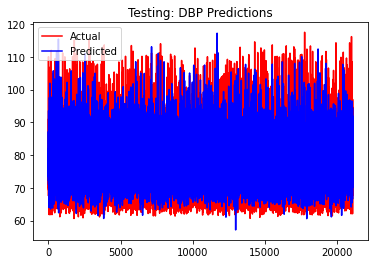

In [ ]:
test_predicted = model.predict(test_x)

plt.plot(test_y[:,0], color='r', label = 'Actual')
plt.plot(test_predicted[:,0]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Testing : SBP Predictions')

plt.show()

plt.plot(test_y[:,1], color='r', label = 'Actual')
plt.plot(test_predicted[:,1]*max_ABP, color='b', label = 'Predicted')
plt.legend()
plt.title('Testing: DBP Predictions')

plt.show()

# Evaluating the Model
Kindly refer the excel sheet attached in the repository

In [ ]:
def test_dataset(test_x, test_y, model):
   
   predicted = model.predict(test_x)
   predicted = predicted*max_ABP
   predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])

   predicted = pd.DataFrame(predicted, columns=['SBP', 'DBP'])
   test_y = pd.DataFrame(test_y, columns=['SBP', 'DBP'])

   mae_sbp  =   mean_absolute_error(test_y['SBP'], predicted['SBP'])
   sd_sbp =    stdev(predicted['SBP'])
   mae_dbp  =   mean_absolute_error(test_y['DBP'], predicted['DBP'])
   sd_dbp =    stdev(predicted['DBP'])
   mae_map = mean_absolute_error((test_y['SBP'] + 2*test_y['DBP'])/3, (predicted['SBP'] + 2*test_y['DBP'])/3)
   sd_map = stdev((predicted['SBP'] + 2*test_y['DBP'])/3)


   sbp_diff = np.absolute(predicted['SBP'] - test_y['SBP'])
   dbp_diff = np.absolute(predicted['DBP'] - test_y['DBP'])
   map_diff = (sbp_diff + 2*dbp_diff)/3

   #SBP
   test_sbp_5 = []
   predicted_sbp_5 = []

   test_sbp_10 = []
   predicted_sbp_10 = []

   test_sbp_15 = []
   predicted_sbp_15 = []


   #DBP
   test_dbp_5 = []
   predicted_dbp_5 = []

   test_dbp_10 = []
   predicted_dbp_10 = []

   test_dbp_15 = []
   predicted_dbp_15 = []


   #MAP
   test_map_5 = []
   predicted_map_5 = []

   test_map_10 = []
   predicted_map_10 = []

   test_map_15 = []
   predicted_map_15 = []

   for i in range(len(sbp_diff)):
      #SBP
      if sbp_diff[i] <= 5:
         test_sbp_5.append(test_y['SBP'][i])
         predicted_sbp_5.append(predicted['SBP'][i])
      
      if(sbp_diff[i] <= 10):
         test_sbp_10.append(test_y['SBP'][i])
         predicted_sbp_10.append(predicted['SBP'][i])

      if(sbp_diff[i] <= 15):
         test_sbp_15.append(test_y['SBP'][i])
         predicted_sbp_15.append(predicted['SBP'][i])

      
      #DBP
      if dbp_diff[i] <= 5:
         test_dbp_5.append(test_y['DBP'][i])
         predicted_dbp_5.append(predicted['DBP'][i])
      
      if(dbp_diff[i] <= 10):
         test_dbp_10.append(test_y['DBP'][i])
         predicted_dbp_10.append(predicted['DBP'][i])

      if(dbp_diff[i] <= 15):
         test_dbp_15.append(test_y['DBP'][i])
         predicted_dbp_15.append(predicted['DBP'][i])


      #MAP
      if map_diff[i] <= 5:
         test_map_5.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_5.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)
      
      if(map_diff[i] <= 10):
         test_map_10.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_10.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)

      if(map_diff[i] <= 15):
         test_map_15.append((test_y['SBP'][i] + 2*test_y['DBP'][i])/3)
         predicted_map_15.append((predicted['SBP'][i] + 2*test_y['DBP'][i])/3)

      
   percent_sbp_5 = (len(test_sbp_5)/len(test_y['SBP'])) * 100
   percent_sbp_10 = (len(test_sbp_10)/len(test_y['SBP'])) * 100
   percent_sbp_15 = (len(test_sbp_15)/len(test_y['SBP'])) * 100

   percent_dbp_5 = (len(test_dbp_5)/len(test_y['SBP'])) * 100
   percent_dbp_10 = (len(test_dbp_10)/len(test_y['SBP'])) * 100
   percent_dbp_15 = (len(test_dbp_15)/len(test_y['SBP'])) * 100

   percent_map_5 = (len(test_map_5)/len(test_y['SBP'])) * 100
   percent_map_10 = (len(test_map_10)/len(test_y['SBP'])) * 100
   percent_map_15 = (len(test_map_15)/len(test_y['SBP'])) * 100

   return {
      'MAE SBP' : mae_sbp,
      'SD SBP' : sd_sbp,
      'MAE DBP' : mae_dbp,
      'SD DBP' : sd_dbp,
      'MAE MAP' : mae_map,
      'SD MAP' : sd_map,
      'SBP < 5' : percent_sbp_5,
      'SBP < 10' : percent_sbp_10,
      'SBP < 15' : percent_sbp_15,
      'DBP < 5' : percent_dbp_5,
      'DBP < 10' : percent_dbp_10,
      'DBP < 15' : percent_dbp_15,
      'MAP < 5' : percent_map_5,
      'MAP < 10' : percent_map_10,
      'MAP < 15' : percent_map_15,
   }



## Segregating the Dataset into Hypo, Normo and Hyper tensive

In [ ]:
test_y_hypo = []
test_x_hypo = []

test_y_normo = []
test_x_normo = []

test_y_hyper = []
test_x_hyper = []

for i in range(test_y.shape[0]):
    
    if(test_y[i][0]<90 or test_y[i][1]<60):
        test_y_hypo.append([test_y[i][0],test_y[i][1]])
        test_x_hypo.append(test_x[i,:,:])
    
    elif(test_y[i][0]>140 or test_y[i][1]>90):
        test_y_hyper.append([test_y[i][0],test_y[i][1]])
        test_x_hyper.append(test_x[i,:,:])

    else:
        test_y_normo.append([test_y[i][0],test_y[i][1]])
        test_x_normo.append(test_x[i,:,:])

In [ ]:
hypo_results = test_dataset(model=model, test_x=np.array(test_x_hypo), test_y=np.array(test_y_hypo))

In [ ]:
hypo_results

{'DBP < 10': 95.65217391304348,
 'DBP < 15': 100.0,
 'DBP < 5': 73.91304347826086,
 'MAE DBP': 3.711205201729429,
 'MAE MAP': 6.417998183939375,
 'MAE SBP': 19.253994551818124,
 'MAP < 10': 60.86956521739131,
 'MAP < 15': 73.91304347826086,
 'MAP < 5': 47.82608695652174,
 'SBP < 10': 47.82608695652174,
 'SBP < 15': 60.86956521739131,
 'SBP < 5': 30.434782608695656,
 'SD DBP': 5.6001627594904555,
 'SD MAP': 7.463538298605689,
 'SD SBP': 19.34268284023256}

In [ ]:
np.array(test_x_hypo).shape

(23, 250, 2)

In [ ]:
np.array(test_y_hypo).shape

(23, 2)

In [ ]:
hyper_results = test_dataset(model=model, test_x=np.array(test_x_hyper), test_y=np.array(test_y_hyper))

In [ ]:
hyper_results

{'DBP < 10': 85.28935653581546,
 'DBP < 15': 94.15216511533792,
 'DBP < 5': 59.773371104815865,
 'MAE DBP': 5.49163001272182,
 'MAE MAP': 3.214234367375821,
 'MAE SBP': 9.642703102127465,
 'MAP < 10': 78.46013759611493,
 'MAP < 15': 91.9971671388102,
 'MAP < 5': 45.69000404694455,
 'SBP < 10': 63.891137191420476,
 'SBP < 15': 77.7114528530959,
 'SBP < 5': 41.07648725212464,
 'SD DBP': 6.283576299598315,
 'SD MAP': 6.683830327790897,
 'SD SBP': 11.631161323724202}

In [ ]:
np.array(test_x_hyper).shape

(9884, 250, 2)

In [ ]:
normo_results = test_dataset(model=model, test_x=np.array(test_x_normo), test_y=np.array(test_y_normo))

In [ ]:
normo_results

{'DBP < 10': 88.982292970846,
 'DBP < 15': 97.44231801108924,
 'DBP < 5': 61.849400822750844,
 'MAE DBP': 4.838540734110629,
 'MAE MAP': 3.076932618046957,
 'MAE SBP': 9.230797854140869,
 'MAP < 10': 81.33607583616526,
 'MAP < 15': 93.37327848327669,
 'MAP < 5': 50.51869075299589,
 'SBP < 10': 67.00053657664104,
 'SBP < 15': 79.88731890538365,
 'SBP < 5': 43.53425147558576,
 'SD DBP': 5.447538125952652,
 'SD MAP': 6.3245954377319356,
 'SD SBP': 12.387575851099143}